In [1]:
from sklearn.cluster import KMeans
import skimage
import scipy.misc
import numpy as np
import tensorflow as tf
import skimage.color
import matplotlib.pyplot as plt
import os 
%matplotlib inline

In [12]:
def rgb2lab(image):
    '''
    L range: 0 ~ 100
    a range: -128 ~ 127
    b range: -128 ~ 127
    
    '''
    lab_color = skimage.color.rgb2lab(image)
    return lab_color


def lab2rgb(image):
    rgb_color = skimage.color.lab2rgb(image)
    return rgb_color

In [23]:
def rgb2yuv(image):
    yuv_color = skimage.color.rgb2yuv(image)
    return yuv_color


In [4]:
path = 'D:\\PythonScript\\Comp5422\\github\\forest_image\\'
path_1 = 'D:\\PythonScript\\Comp5422\\github\\forest_resize\\'

In [ ]:
'''

Image Resizing (256, 256, 3) to (128, 128, 3)


'''
for file in iter(os.listdir(path = path)):
    openpath = path + str(file)
    image = scipy.misc.imread(openpath)
    image = scipy.misc.imresize(image, (128, 128))
    savepath = path_1 + str(file)
    scipy.misc.imsave(savepath, image)

In [5]:
'''

Generate Palette/Combine all the images

'''
imagelist = []
for imgs in iter(os.listdir(path_1)):
    openpath = path_1 + str(imgs)
    image = scipy.misc.imread(openpath)
    height = image.shape[0]
    width = image.shape[1]
    image_lab = rgb2lab(image)
    image_lab_reshape = np.reshape(image_lab,(height * width, 3))
    imagelist.append(image_lab_reshape)

In [23]:
combined_image = np.concatenate(imagelist[:20], axis = 0)
combined_image.shape

(327680, 3)

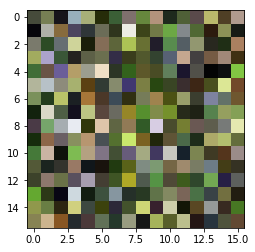

In [27]:
kmeans = KMeans(n_clusters = 256, max_iter = 40, random_state = 0, n_jobs = -1).fit(combined_image)
palette1 = kmeans.cluster_centers_
palette1 = np.reshape(palette1, [16, 16, 3])
plt.imshow(lab2rgb(palette1))

In [29]:
palette_save = lab2rgb(palette1)
palette_save = np.reshape(palette_save, [256, 3])
np.save('./forest_palette.npy', palette_save)

In [35]:
'''
rgb to ab palette

'''

rgb_palette = np.load('forest_palette.npy')

rgb_palette = np.reshape(rgb_palette, [16, 16, 3])


lab_palette = rgb2lab(rgb_palette)
ab_palette = lab_palette[:,:,1:]
ab_palette.shape

ab_palette = np.reshape(ab_palette, [256, 2])
ab_palette.shape

np.save('ab_palette', ab_palette)

'\nIn tensorflow, there are three ways to load data\n\n1. numpy array\n2. placeholder\n3. queue\n\n'

In [48]:
'''
rgb 2 hsv palette
'''
rgb_palette = np.load('forest_palette.npy')
rgb_palette = np.reshape(rgb_palette, [16, 16, 3])
hsv_palette = rgb2hsv(rgb_palette)
hs_palette = hsv_palette[:,:,:2]
hs_palette = np.reshape(hs_palette, [256, 2])
hs_palette.shape
np.save('hs_palette', hs_palette)

In [22]:
'''
rgb 2 yuv palette
'''
rgb_palette = np.load('forest_palette.npy')
rgb_palette = np.reshape(rgb_palette, [16, 16, 3])
yuv_palette = rgb2yuv(rgb_palette)
uv_palette = yuv_palette[:,:,1:]
uv_palette = np.reshape(uv_palette, [256, 2])
np.save('uv_palette', uv_palette)
uv_palette.shape

(256, 2)

In [36]:
'''

Genearate Training/Testing Data


'''
imagedata = []
for imgs in iter(os.listdir(path_1)):
    openpath = path_1 + str(imgs)
    image = scipy.misc.imread(openpath)
    imagedata.append(image)
batchdata = np.stack(imagedata)

In [52]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(batchdata, test_size = 0.1)
np.save('./train_data', train)
np.save('./test_data', test)

In [2]:
pit = np.load('pts_in_hull.npy')
pit.shape

(313, 2)

In [5]:
modified = np.load('modi_pts_in_hull.npy')
modified = modified/80
modified

array([[-0.75 ,  0.25 ],
       [-0.75 ,  0.375],
       [-0.75 ,  0.5  ],
       [-0.75 ,  0.625],
       [-0.75 ,  0.75 ],
       [-0.75 ,  0.875],
       [-0.75 ,  1.   ],
       [-0.75 ,  1.125],
       [-0.625, -0.375],
       [-0.625, -0.25 ],
       [-0.625, -0.125],
       [-0.625,  0.   ],
       [-0.625,  0.125],
       [-0.625,  0.25 ],
       [-0.625,  0.375],
       [-0.625,  0.5  ],
       [-0.625,  0.625],
       [-0.625,  0.75 ],
       [-0.625,  0.875],
       [-0.625,  1.   ],
       [-0.625,  1.125],
       [-0.625,  1.25 ],
       [-0.5  , -0.5  ],
       [-0.5  , -0.375],
       [-0.5  , -0.25 ],
       [-0.5  , -0.125],
       [-0.5  ,  0.   ],
       [-0.5  ,  0.125],
       [-0.5  ,  0.25 ],
       [-0.5  ,  0.375],
       [-0.5  ,  0.5  ],
       [-0.5  ,  0.625],
       [-0.5  ,  0.75 ],
       [-0.5  ,  0.875],
       [-0.5  ,  1.   ],
       [-0.5  ,  1.125],
       [-0.5  ,  1.25 ],
       [-0.375, -0.625],
       [-0.375, -0.5  ],
       [-0.375, -0.375],


In [6]:
np.save('modi2.npy',modified )

In [3]:
import json
data = json.load(open('D:\\PythonScript\\Comp5422\\colordata.json'))
palette = np.zeros((256, 1, 3))
for i in range(256):
    palette[i,:,0] = data[i]['rgb']['r']
    palette[i,:,1] = data[i]['rgb']['g']
    palette[i,:,2] = data[i]['rgb']['b']

palette = np.reshape(palette,(256, 3)).astype(np.uint8)

np.save('rgb_std_palette.npy', palette)

In [8]:
palette = np.load('rgb_std_palette.npy')/255.

np.save('rgb_std_palette.npy', palette)

In [9]:
np.load('rgb_std_palette.npy')

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.50196078,  0.        ,  0.        ],
       [ 0.        ,  0.50196078,  0.        ],
       [ 0.50196078,  0.50196078,  0.        ],
       [ 0.        ,  0.        ,  0.50196078],
       [ 0.50196078,  0.        ,  0.50196078],
       [ 0.        ,  0.50196078,  0.50196078],
       [ 0.75294118,  0.75294118,  0.75294118],
       [ 0.50196078,  0.50196078,  0.50196078],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  1.        ],
       [ 0.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.37254902],
       [ 0.        ,  0.        ,  0.52941176],
       [ 0.        ,  0.        ,  0.68627451],
       [ 0.        ,  0.        ,  0.843